# **Hull-White Model: Theoretical Explanation and Simulation**

## **1. Introduction**
The **Hull-White model** is a short-rate interest rate model used in finance to describe the evolution of interest rates over time. It is an extension of the **Vasicek model** that allows for a time-dependent mean reversion level, making it more flexible in fitting market data.

## **2. Mathematical Formulation**
The Hull-White model assumes that the short rate $ r_t $ follows the stochastic differential equation (SDE):

$$ dr_t = \lambda (\theta(t) - r_t) dt + \eta dW_t $$

where:
- $ \lambda $ = Mean reversion speed
- $ \theta(t) $ = Time-dependent mean reversion level
- $ \eta $ = Volatility
- $ dW_t $ = Standard Brownian motion

This equation models the **mean-reverting** behavior of interest rates, meaning that rates tend to revert to a long-term average over time.

## **3. Mean Reversion Level ($ \theta(t) $)**
To fit the model to an observed **zero-coupon bond price curve** $ P(0,T) $, we use:

$$ f(0,T) = -\frac{d}{dT} \ln P(0,T) $$

where $ f(0,T) $ is the instantaneous forward rate. The mean reversion level $ \theta(t) $ is then:

$$ \theta(t) = \frac{1}{\lambda} \left( \frac{d}{dt} f(0,t) \right) + f(0,t) + \frac{\eta^2}{2\lambda^2} \left( 1 - e^{-2\lambda t} \right) $$

This ensures that the Hull-White model is consistent with market-observed bond prices.

## **4. Euler-Maruyama Approximation**
Since the SDE cannot be solved analytically, we use the **Euler-Maruyama method** to simulate the short rate dynamics. The discrete approximation is:

$$ r_{t+\Delta t} = r_t + \lambda (\theta(t) - r_t) \Delta t + \eta dW_t $$

where:
$$ dW_t = \sqrt{\Delta t} \cdot Z, \quad Z \sim N(0,1) $$

This allows us to generate multiple paths of interest rates under the Hull-White model.

## **5. Simulation Algorithm**
The simulation follows these steps:
1. **Discretize the time interval** $ [0, T] $ into $ N $ steps of size $ \Delta t $.
2. **Compute the forward rate** $ f(0,t) $ from the bond curve.
3. **Calculate the mean reversion level** $ \theta(t) $.
4. **Generate random normal samples** $ Z \sim N(0,1) $.
5. **Iterate using the Euler scheme**:
   - Update the Brownian motion: $ W_{t+\Delta t} = W_t + \sqrt{\Delta t} \cdot Z $
   - Update the short rate: $ r_{t+\Delta t} $

## **6. Interpretation of Parameters**
- **Higher $ \lambda $**: Faster mean reversion, leading to less volatility in interest rates.
- **Higher $ \eta $**: Greater randomness in interest rate fluctuations.
- **$ \theta(t) $**: Adjusts the long-term target level of rates.

## **7. Application in Quantitative Finance**
- **Bond Pricing**: Used to derive bond prices and yield curves.
- **Option Pricing**: Helps price interest rate derivatives such as swaptions.
- **Risk Management**: Models future interest rate movements for portfolio hedging.

The Hull-White model is widely used in financial engineering due to its analytical tractability and ability to fit observed market data effectively.lity and ability to fit observed market data effectively.



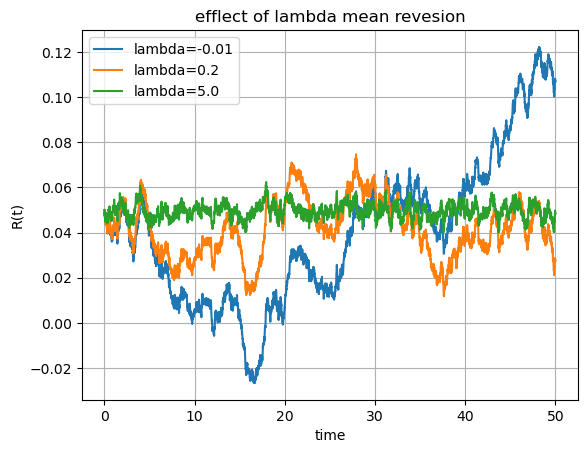

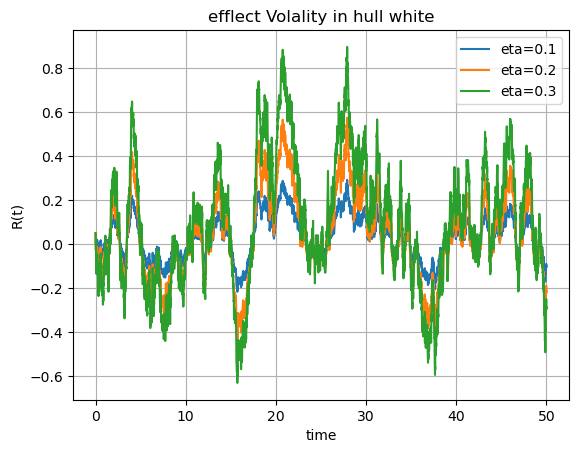

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def GeneratePathsHWEuler(NoOfPaths,NoOfSteps,T,P0T, lambd, eta): 
    dt=0.0001
    f0T= lambda t:-(np.log(P0T(t+dt))-np.log(P0T(t-dt)))/(2*dt)
    
    r0=f0T(0.0001)
    theta = lambda t : 1.0/lambd * (f0T(t+dt)-f0T(t-dt))/(2.0*dt) + f0T(t) + eta*eta/(2.0*lambd*lambd)*(1.0-np.exp(-2.0*lambd*t)) 
    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
    R = np.zeros([NoOfPaths, NoOfSteps+1])
    R[:,0]=r0
    time = np.zeros([NoOfSteps+1])
        
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        R[:,i+1] = R[:,i] + lambd*(theta(time[i]) - R[:,i]) * dt + eta* (W[:,i+1]-W[:,i])
        time[i+1] = time[i] +dt
        
    # Outputs
    paths = {"time":time,"R":R}
    return paths

def mainCalculation():
    NoOfPaths = 1
    NoOfSteps = 5000
    T         = 50.0
    lambd     = 0.5
    eta       = 0.01
    # We define a ZCB curve (obtained from the market)
    P0T = lambda T: np.exp(-0.05*T)
    
    # Effect of mean reversion lambda
    plt.figure(1) 
    legend = []
    lambdVec = [-0.01, 0.2, 5.0]
    for lambdTemp in lambdVec:    
        np.random.seed(2)
        Paths = GeneratePathsHWEuler(NoOfPaths,NoOfSteps,T,P0T, lambdTemp, eta)
        legend.append('lambda={0}'.format(lambdTemp))
        timeGrid = Paths["time"]
        R = Paths["R"]
        plt.plot(timeGrid, np.transpose(R))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("R(t)")
    plt.title("efflect of lambda mean revesion")
    plt.legend(legend)
        
    # Effect of the volatility
    plt.figure(2)    
    legend = []
    etaVec = [0.1, 0.2, 0.3]
    for etaTemp in etaVec:
        np.random.seed(2)
        Paths = GeneratePathsHWEuler(NoOfPaths,NoOfSteps,T,P0T, lambd, etaTemp)
        legend.append('eta={0}'.format(etaTemp))
        timeGrid = Paths["time"]
        R = Paths["R"]
        plt.plot(timeGrid, np.transpose(R))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("R(t)")
    plt.legend(legend)
    plt.title("efflect Volality in hull white")
    
mainCalculation()
    